<a href="https://colab.research.google.com/github/Rustydinoco/ML_Learning/blob/master/Diabetest_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [283]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [284]:
class Model(nn.Module):
   def __init__(self,in_features = 8, h1 = 12, h2 = 18, h3 = 24, out_features = 2):
      super().__init__()
      self.fc1 = nn.Linear(in_features,h1)
      self.fc2 = nn.Linear(h1,h2)
      self.fc3 = nn.Linear(h2,h3)
      self.fc4 = nn.Linear(h3,out_features)

   def forward(self,x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = F.relu(self.fc3(x))
      x = self.fc4(x)
      return x

In [285]:
torch.manual_seed(41)

model = Model()

In [286]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [287]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [288]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [289]:
X = X.values
y = y.values

In [290]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [291]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [292]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [293]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [278]:
epochs = 100000
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i % 100 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Streaming output truncated to the last 5000 lines.
Epoch: 50000 Loss: 0.1230400875210762
Epoch: 50010 Loss: 0.12300446629524231
Epoch: 50020 Loss: 0.12300737202167511
Epoch: 50030 Loss: 0.12310636043548584
Epoch: 50040 Loss: 0.12301464378833771
Epoch: 50050 Loss: 0.12295901030302048
Epoch: 50060 Loss: 0.12303797900676727
Epoch: 50070 Loss: 0.12312310934066772
Epoch: 50080 Loss: 0.12297958880662918
Epoch: 50090 Loss: 0.12294627726078033
Epoch: 50100 Loss: 0.12281928211450577
Epoch: 50110 Loss: 0.1228545755147934
Epoch: 50120 Loss: 0.12287672609090805
Epoch: 50130 Loss: 0.12284965068101883
Epoch: 50140 Loss: 0.1229533925652504
Epoch: 50150 Loss: 0.12294746935367584
Epoch: 50160 Loss: 0.12311504036188126
Epoch: 50170 Loss: 0.12280081957578659
Epoch: 50180 Loss: 0.12272735685110092
Epoch: 50190 Loss: 0.1229226142168045
Epoch: 50200 Loss: 0.12289410084486008
Epoch: 50210 Loss: 0.1227291151881218
Epoch: 50220 Loss: 0.12280375510454178
Epoch: 50230 Loss: 0.12276207655668259
Epoch: 50240 Loss:

Text(0.5, 0, 'Epoch')

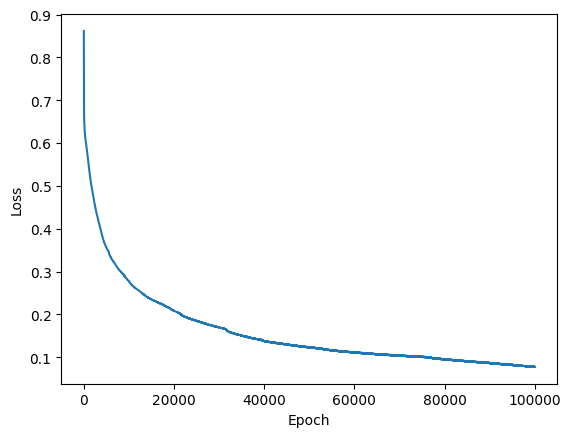

In [279]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [280]:
#with torch.no_grad():
 # y_eval = model.forward(X_test)
  #loss = criterion(y_eval, y_test)

In [281]:
#loss

In [282]:
correct = 0
for i, data in enumerate(X_test):
  y_pred = model.forward(data)
  if y_test[i] == 0:
    x = 'Non_Diabetic'
  else :
    x = 'Diabetic'

print(f'{i+1}.) {str(y_pred)}  \t {x} \t { y_pred.argmax().item()}')

if y_pred.argmax().item() == y_test[i]:
  correct += 1

print(f'we got {correct} correct')

154.) tensor([ 48.0599, -67.8575], grad_fn=<ViewBackward0>)  	 Non_Diabetic 	 0
we got 1 correct
